# Data Exploration

This notebook performs initial data exploration and visualization for a chosen equity ticker (controlled by the TICKER variable). It loads historical price data from ../data/{TICKER}_data.parquet into `df`, inspects structure and summary statistics, and visualizes the historical closing price to check data behavior

Detailed description of steps presented in this notebook:
- Understand data structure and data formats;
- Check missing data, zeros and nan values;
- Check descriptive statistics of the data and understand general behavior;

Final purpose:
- Based on findings develop preprocessing.py file that will be generating the treated file for the model.

Notes:
- Data is expected in parquet format at ../data/{TICKER}_data.parquet


In [11]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Configuring ploting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

In [13]:
#Importing data for data analysis and modeling
TICKER = "SPY"
df = pd.read_parquet(f'../data/{TICKER}_data.parquet')

In [14]:
# Checking beging and end of the dataframe
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

# Verifying dataframe structure
print("\nDataFrame info:")
df.info()

# Checking statistical summary
print("\nDescritive Statistics:")
print(df.describe())

First 5 rows:
Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2018-10-18  247.862961  251.154062  246.580608  250.553225  134557500
2018-10-19  247.728409  250.463499  247.028941  248.517557  139901600
2018-10-22  246.616501  248.723852  246.078443  248.401034   82415800
2018-10-23  245.360992  246.490912  240.877220  242.975649  146352700
2018-10-24  237.926987  245.495599  237.371003  245.109974  177806700

Last 5 rows:
Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2025-10-09  671.159973  673.940002  669.210022  673.530029   66501900
2025-10-10  653.020020  673.950012  652.840027  672.130005  159422600
2025-10-13  663.039978  665.130005  659.770020  660.650024   7

Data is presented in a pandas data structure called MultiIndex that allows  multiple levels of indexing on both rows and columns. The yfinance library uses this structure probably because it is designed to handle requests for multiple assets simultaneously.

Assuming the objective of the project: Create a predictive model for a **single asset**, this hierarchical structure, instead of helping, creates several technical and complexity-related challenges. 

- Complex Data Access: instead of using a simple df['close'] we would need to use df['price']['close'].
- Incompatibility with Machine Learning Libraries: Most ML libraries expects "flat" DataFrame(with a single column level) as input.
- Complcations for using simple functions and redundancy since we have just one asset.

In [15]:
#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())
print("\nMissing Values Percentage:")
print((df.isnull().mean() * 100).round(2))



Missing Values:
Price   Ticker
Close   SPY       0
High    SPY       0
Low     SPY       0
Open    SPY       0
Volume  SPY       0
dtype: int64

Total Missing Values: 0

Missing Values Percentage:
Price   Ticker
Close   SPY       0.0
High    SPY       0.0
Low     SPY       0.0
Open    SPY       0.0
Volume  SPY       0.0
dtype: float64


In [17]:
#check for nan values
print("\nNaN Values:")
print(df.isna().sum())
print("\nTotal NaN Values:", df.isna().sum().sum())
print("\nNaN Values Percentage:")
print((df.isna().mean() * 100).round(2))


NaN Values:
Price   Ticker
Close   SPY       0
High    SPY       0
Low     SPY       0
Open    SPY       0
Volume  SPY       0
dtype: int64

Total NaN Values: 0

NaN Values Percentage:
Price   Ticker
Close   SPY       0.0
High    SPY       0.0
Low     SPY       0.0
Open    SPY       0.0
Volume  SPY       0.0
dtype: float64


No missing values or NaN.

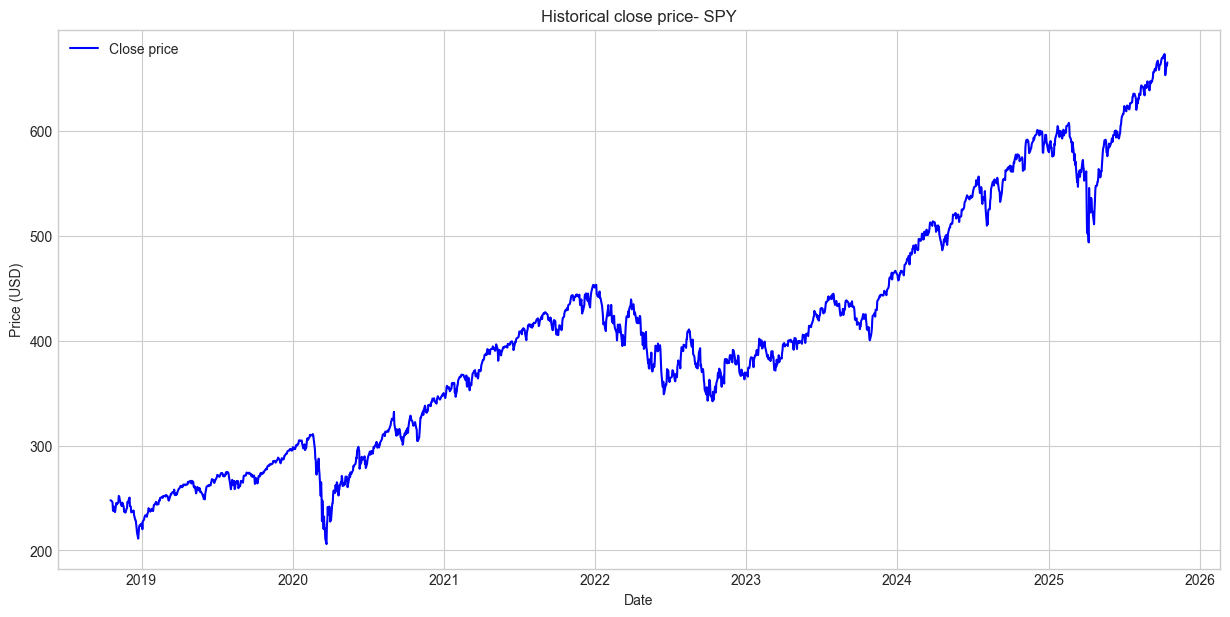

In [16]:
# Plotting closing price ('Close') in a time series
plt.figure()
plt.title(f'Historical close price- {TICKER}')
plt.plot(df.index, df['Close'], label='Close price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Approach based on initial analyzis to proceed with Modeling:

1 - Turn the Hirarchy Flat: Eliminate the MultiIndex Structure;

2 - Clean dataset;

3 - Standardize and add ticker column to support future expansions of the application.